In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

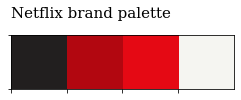

In [490]:
paleta=['#221f1f', '#b20710', '#e50914','#f5f5f1']
sns.palplot(paleta)
plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2);


### Ver

Idioma-Calificacion

Genero-Idioma

Genero-Anno

In [540]:
df=pd.read_csv('data/netflix_titles.csv', encoding="latin-1")     ### cambio el 'encoding' ya que el dataset contiene caracteres no incluidos en 'utf-8'
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


##### Comprobamos los valores nulos

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Limpiamos los datos nulos

##### Director, cast, country los dejamos ya que si no la mayoria de series se van. Estan vacios ya que al algunos contener varias temporadas, estos mismos pueden ser distintos en cada una

In [542]:


df['director'].fillna('Sin Director', inplace=True)
df['cast'].fillna("Sin Cast", inplace=True)
df['country'].fillna("Sin Pais", inplace=True)


df.dropna(inplace=True)



#### Formateamos la fecha

In [543]:
df["date_added"] = pd.to_datetime(df['date_added'])


In [544]:
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


In [496]:
pepe = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

pepe['total']=pepe.iloc[0::].sum(axis=1)
pepe.sort_values(by='total').tail(5)
data_sub.head(319)


type,Movie,TV Show
year_added,,
2008,1.0,0.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,1.0
2014,14.0,0.0
2015,47.0,3.0
2016,195.0,7.0


In [497]:
for i, mtv in enumerate(pepe.sort_values(by='total').tail(5).index):
    print (i,"    ",mtv)


0      Dramas, Independent Movies, International Movies
1      Comedies, Dramas, International Movies
2      Stand-Up Comedy
3      Documentaries
4      Dramas, International Movies


In [498]:
data_sub = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

data_sub['total']=data_sub.iloc[0::].sum(axis=1)
top_cinco=data_sub.sort_values(by='total').tail(5)
top_cinco


year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
listed_in,,,,,,,,,,,,,,,
"Dramas, Independent Movies, International Movies",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,56.0,76.0,38.0,30.0,252.0
"Comedies, Dramas, International Movies",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,36.0,65.0,55.0,72.0,43.0,274.0
Stand-Up Comedy,0.0,0.0,0.0,0.0,0.0,4.0,4.0,12.0,36.0,62.0,86.0,65.0,48.0,17.0,334.0
Documentaries,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,35.0,88.0,73.0,80.0,34.0,39.0,359.0
"Dramas, International Movies",0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,15.0,46.0,99.0,62.0,76.0,60.0,362.0


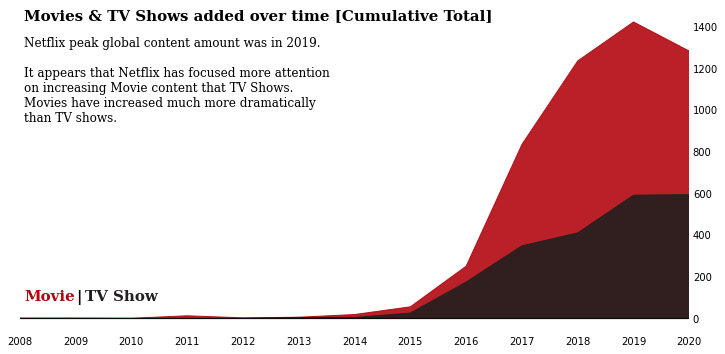

In [511]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(data_sub.index):
    mtv_rel = data_sub.T[mtv]
    
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [509]:
df['type'].value_counts().index
data_sub.T['Movie']

year_added
2008       1.0
2009       2.0
2010       1.0
2011      13.0
2012       3.0
2013       6.0
2014      19.0
2015      56.0
2016     251.0
2017     836.0
2018    1237.0
2019    1424.0
2020    1284.0
2021     993.0
Name: Movie, dtype: float64

In [ ]:
data_sub = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

data_sub['total']=data_sub.iloc[0::].sum(axis=1)
top_cinco=data_sub.sort_values(by='total').tail(5)
data_sub.drop(['total'],axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(18, 9))

### Se crea un indice con todas las categorias
for i, mtv in enumerate(top_cinco.index): 
    mtv_rel = data_sub.T[mtv]
    print(mtv_rel)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, label=mtv,alpha=0.8)




for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
ax.grid(False)

fig.text(0.13, 0.8, 'Contenido subido en funcion de la categoria', fontsize=25,fontweight='bold')
fig.text(0.13, 0.6, 
'''Podemos ver que a partir de 2015 comenzo un crecimiento exponencial, 
aparentemente en la gran mayoria de categorias, hasta 2019. 

Al final parece darse un ligero repunte tras la "regulación" de la situación
causada por el COVID-19
                        '''
        , fontsize=15, fontweight='light');

In [524]:
data_sub = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

data_sub['total']=data_sub.iloc[0::].sum(axis=1)
top_cinco=data_sub.sort_values(by='total').tail(5)
data_sub.drop(['total'],axis=1, inplace=True)


In [525]:
data_sub.T['Dramas, Independent Movies, International Movies']

year_added
2008     0.0
2009     0.0
2010     0.0
2011     0.0
2012     0.0
2013     0.0
2014     0.0
2015     0.0
2016    14.0
2017    38.0
2018    56.0
2019    76.0
2020    38.0
2021    30.0
Name: Dramas, Independent Movies, International Movies, dtype: float64

In [539]:
colores=['#8B11FE','#ABFE11','#FE4E11','#FE1159','#2711FE']
data=[]
for i, mtv in enumerate(top_cinco.index):
    trace = go.Scatter(
                    x = data_sub.T[mtv].index,
                    y = data_sub.T[mtv],
                    mode = "lines",
                    marker = dict(color = colores),
                    name=mtv
                    )
    data.append(trace)


layout = dict(title = 'Top 5 Categorias mas subidas a Netflix',
              xaxis= dict(title= 'Order ',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [ ]:
anadidos= df.groupby('month_name_added')['show_id'].count()
anadidos=pd.DataFrame(anadidos).reset_index()
anadidos.rename(columns={'month_name_added':'Mes',
                        'show_id':'Subidas'},inplace=True)

In [ ]:
anadidos= df.groupby('month_name_added')['show_id'].count()
anadidos

month_name_added
April        763
August       754
December     812
February     562
January      737
July         827
June         728
March        741
May          632
November     705
October      760
September    769
Name: show_id, dtype: int64

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
data_sub = anadidos.groupby('Mes')['Subidas'].value_counts().unstack().fillna(0).T
fig, ax = plt.subplots(1, 1, figsize=(18, 9))

for i, mtv in enumerate(anadidos['Mes'].value_counts().index):      
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, label=mtv,alpha=0.8)


for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
ax.grid(False)


KeyError: 'Mes'

In [ ]:
#lineplot

### Variacion de la longitud de las pelis o series segun pasan los annos

In [ ]:
movies=df[df.type=='Movie']
shows=df[df.type=='TV Show']

In [ ]:
### Formateamos duracion


In [ ]:
movies.duration=movies.duration.map(lambda x : int(x.split(" ")[0]))
movies

C:\Users\Adrian\AppData\Local\Temp/ipykernel_7628/22053521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration=movies.duration.map(lambda x : int(x.split(" ")[0]))


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Sin Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Sin Pais,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,March,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020


In [ ]:
duracion_m= movies[['duration','release_year']].sort_values(by='release_year')

duracion_m=duracion_m.groupby('release_year').mean()
duracion_m.reset_index(inplace=True)
duracion_m



,release_year,duration
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000
...,...,...
68,2017,95.611765
69,2018,96.185137
70,2019,93.466035
71,2020,92.141199


In [ ]:
fig, ax = px.bar(x=duracion_m.release_year, y=duracion_m.duration,
             hover_data=[duracion_m.release_year, duracion_m.duration], height=400)


fig.show()

ValueError: too many values to unpack (expected 2)

### calificacion por paises

In [597]:
df
#cal=pd.DataFrame(df.groupby('country')['rating'].value_counts().unstack().fillna(0)).T.sum(axis=1)
pd.DataFrame(df.groupby('country')['rating'].value_counts().unstack().fillna(0)).T.max(axis=1)


rating
G            29.0
NC-17         1.0
NR           34.0
PG          164.0
PG-13       289.0
R           440.0
TV-14       550.0
TV-G         82.0
TV-MA       927.0
TV-PG       249.0
TV-Y         87.0
TV-Y7       101.0
TV-Y7-FV      1.0
UR            1.0
dtype: float64

g-General audiences
pg- parental guidance suggested
pg-13- mayores 13 annos
R- menores de 17 con tutor
NC17- adults-only
Tv-y- publico preinfantil -6 anos
Tv-v7 - mas 7 anos
Tv-V7-Fv - 7 annos
Tv-G - Publico general
Tv-PG parental guidance
Tv-14 mayores 14
Tv-MA mayores 17

nr- not rated
ur- el corte original puede diferir del visualizado en cines o teatros